# Fuzzy C-Means

FCM (Fuzzy C-Means) - is a fuzzy clustering algorithm that helps group objects based on their characteristics.

**Main Ideas of FCM:**

**Clusters**: Unlike hard clustering, where an object belongs to only one cluster (e.g. K-means), in FCM each object can belong to several clusters with a certain degree. This means that the boundaries between clusters are fuzzy.

**Degree of Membership:** Each object has a degree of membership to each cluster. The degree of membership is measured from 0 to 1, where 0 is no membership and 1 is full membership to the cluster.

**Cluster Centers:** FCM iterates to find optimal cluster centers given the degrees of membership of objects to these clusters.

# Fuzzy C-Means (FCM) Algorithm
### 1. Initialization

##### Step 1: Setting Parameters

- **Number of Clusters (c)**: This is the number of groups into which we want to divide our data. For example, if we have a dataset about flowers, we might choose three clusters: "red," "blue," and "yellow."
- **Fuzziness Parameter (m)**: This defines the degree of "fuzziness" of the clusters. It is usually chosen as $m > 1$, and a common value is $ m = 2$. The larger the value of $ m$, the more blurred the boundaries of the clusters become, meaning that an object can belong to multiple clusters to a greater extent.

##### Step 2: Initializing Cluster Centers

We start by selecting the initial cluster centers. This can be done randomly by choosing a few objects from the data or by simply assigning arbitrary coordinates.


### 2. Calculating Membership Degrees
In this step, should compute how much each object belongs to each cluster. Unlike hard clustering, where an object either belongs to a cluster or does not, in Fuzzy C-Means (FCM), each object has a degree of membership to each cluster that ranges from 0 to 1.

##### Step 1: Distance Calculation

We determine the distance from each object $i$ to each cluster center $ j$, denoted as $ d_{ij}$. Typically, Euclidean distance is used:

$$d_{ij} = (x_i - c_j)^2$$

where $ x_i$ are the coordinates of object $ i$, and $ c_j$ are the coordinates of cluster center $ j$.

##### Step 2: Calculating Membership Degrees

Based on the calculated distances, we determine how much each object belongs to each cluster. The membership degree $ u_{ij}$ for object $ i$  to cluster $ j$ is computed using the formula:

$$u_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{d_{ij}}{d_{ik}} \right)^{\frac{2}{m-1}}}$$

where:

- $ d_{ij}$ is the distance from object $ i$ to cluster center $ j$.
- $ d_{ik}$ is the distance from object $ i$ to cluster center $ k$.
- $ m$ is the fuzziness parameter.

This formula takes into account the distance of the object to all clusters, so the closer the object is to a cluster, the higher its degree of membership.

### 3. Updating Cluster Centers

After calculating the membership degrees for all objects, we update the cluster centers to make them more accurate.

The formula for updating cluster centers is:

$$c_j = \frac{\sum_{i=1}^{N} u_{ij}^m x_i}{\sum_{i=1}^{N} u_{ij}^m}$$

where:

- $ c_j$ are the new coordinates of cluster center $ j$.
- $ u_{ij}$ is the degree of membership of object $ i$ to cluster $ j$.
- $ x_i$ are the coordinates of object $ i$.
- $ m$ is the fuzziness parameter.
- $ N$ is the total number of objects.

This formula states that each object influences the new location of the center proportionally to its degree of membership to the cluster.

### 4. Checking for Convergence

In this step, we check how much the cluster centers have changed compared to the previous iteration. To do this, we compute the distance between the old and new positions of the centers. If the change is less than a specified threshold (for example, 0.0001), the algorithm terminates. Otherwise, we return to Step 2.

### Example

Consider an example to better understand how this works:

**Initialization**: Suppose we have a dataset of five points: $ (1, 2), (2, 1), (3, 4), (5, 7), (8, 6)$. We want to divide them into two clusters $( c = 2)$.

**Initial Centers**: We randomly initialize cluster centers, for example, at the points $ (2, 2)$ and $ (7, 6)$.

**Calculating Membership Degrees**: We find the distance from each point to each center and calculate the degree of membership of each point to the clusters.

**Updating Cluster Centers**: We recalculate the cluster centers, taking the degrees of membership into account.

**Checking for Convergence**: If the new centers differ significantly from the previous ones, we continue the algorithm from the new Step 2.

### **Individual Tasks**

1. Formulate a task in the field of computing or programming that requires the automatic classification of a set of objects, defined by feature vectors in a feature space.
  
2. Solve the formulated task using clustering mechanisms based on fuzzy logic methods, utilizing simulation software or a high-level programming language.

3. Identify the cluster centers and plot the changes in the values of the objective function.


For this task, I will use the "Students Academic Performance Dataset" from www.kaggle.com. In this analysis, I am interested in the effect of "raising hands" and "visiting resources" on the final grade.


We will perform the fuzzy clustering algorithm using the c-means method and visualize the initial data along with the cluster centers.


In [6]:
import numpy as np
import pandas as pd
import plot_script as pl

In [8]:
# Initialize membership matrix
def initialize_membership_matrix(num_data_points: int, num_clusters: int) -> np.ndarray:
    # Create a random membership matrix and normalize it
    U = np.random.rand(num_data_points, num_clusters)
    U /= np.sum(U, axis=1, keepdims=True)
    return U

In [10]:
# Calculate cluster centers
def calculate_cluster_centers(data: np.ndarray, U: np.ndarray, m: float) -> np.ndarray:
    num_clusters = U.shape[1]
    cluster_centers = np.zeros((num_clusters, data.shape[1]))

    # Calculate the new cluster centers
    for j in range(num_clusters):
        numerator = np.sum((U[:, j] ** m).reshape(-1, 1) * data, axis=0)
        denominator = np.sum(U[:, j] ** m)
        cluster_centers[j] = numerator / denominator
    return cluster_centers

In [12]:
# Update membership matrix
def update_membership_matrix(data: np.ndarray, cluster_centers: np.ndarray, m: float) -> np.ndarray:
    # Calculate distance from each point to each cluster center
    distances = np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2)  # Shape: (num_data_points, num_clusters)
    with np.errstate(divide='ignore', invalid='ignore'):
        # Update membership values based on distances
        U_new = 1 / (distances ** (2 / (m - 1)))
        U_new /= np.sum(U_new, axis=1, keepdims=True)  # Normalize membership values
    return U_new


In [14]:
# Calculate the objective function value
def calculate_objective_function(data: np.ndarray, cluster_centers: np.ndarray, U: np.ndarray, m: float) -> float:
    # Calculate the distances and the objective function value
    distances = np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2)
    J_m = np.sum((U ** m) * (distances ** 2))
    return J_m

In [16]:
# Fuzzy C-Means clustering algorithm with objective function tracking
def fuzzy_c_means(data: np.ndarray, num_clusters: int = 2, m: float = 2, max_iter: int = 100,
                  error: float = 1e-5) -> tuple:
    # Initialize membership matrix
    U = initialize_membership_matrix(data.shape[0], num_clusters)
    objective_values = []  # To track the objective function value at each iteration

    for iteration in range(max_iter):
        # Calculate cluster centers
        cluster_centers = calculate_cluster_centers(data, U, m)
        # Update membership matrix
        U_new = update_membership_matrix(data, cluster_centers, m)

        # Calculate and store the objective function value
        J_m = calculate_objective_function(data, cluster_centers, U, m)
        objective_values.append(J_m)

        # Check for convergence
        max_change = np.max(np.abs(U_new - U))
        if max_change < error:
            break
        U = U_new
    return cluster_centers, U, objective_values

In [18]:
# Load data
df = pd.read_csv("C:/Users/Tanya/Desktop/КПІ/5 semestr/AI/pythonProject1/xAPI-Edu-Data.csv")

In [20]:
# Data selection
df_selection = df.loc[:, ["raisedhands", "VisITedResources", "StageID", "Class"]]
df_stage = df_selection[df_selection["StageID"] == "MiddleSchool"].copy()

In [22]:
# Prepare data
target_mapping = {"L": 0, "M": 1, "H": 2}
df_stage.loc[:, 'Class'] = df_stage['Class'].map(target_mapping) 

data = df_stage[["raisedhands", "VisITedResources"]].values
grades = df_stage['Class'].values

In [24]:
# Parameters for the algorithm
num_clusters = len(target_mapping)
m = 2
max_iter = 100
error = 1e-5

In [26]:
# Execute the fuzzy clustering algorithm
centers, membership_matrix, objective_values = fuzzy_c_means(data, num_clusters, m, max_iter, error)

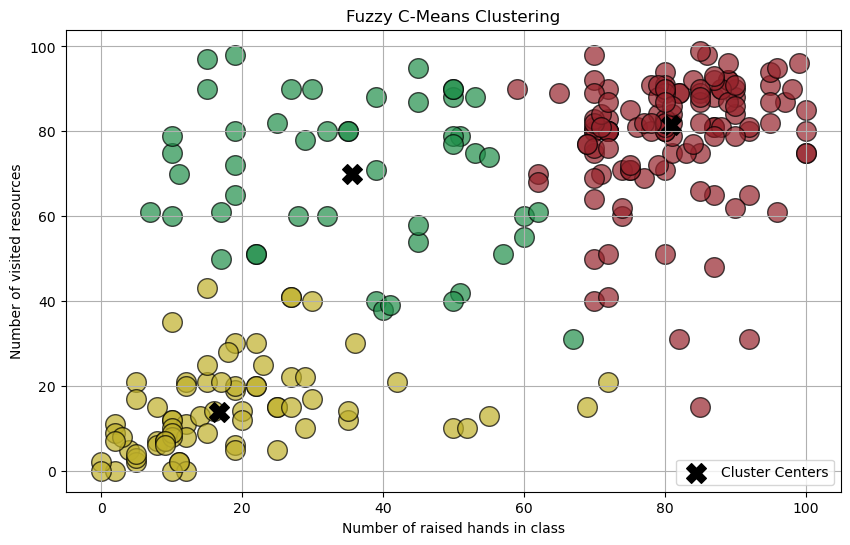

In [28]:
# Visualize results
pl.plot_results(data, centers, membership_matrix)

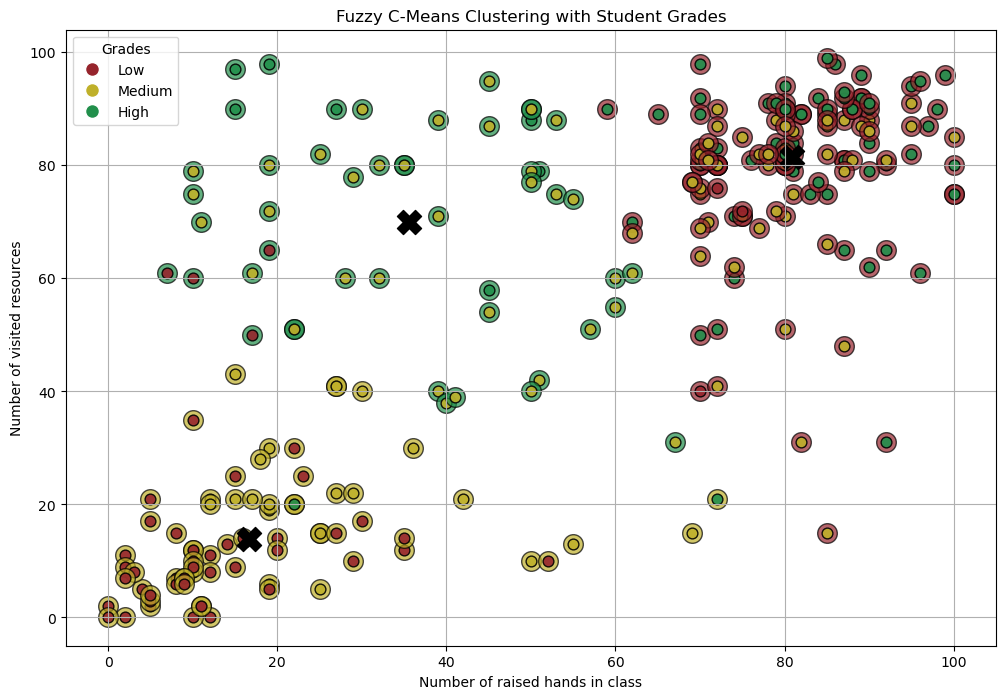

In [30]:
# Visualize with student grades
pl.plot_with_grades(data, centers, membership_matrix, grades)

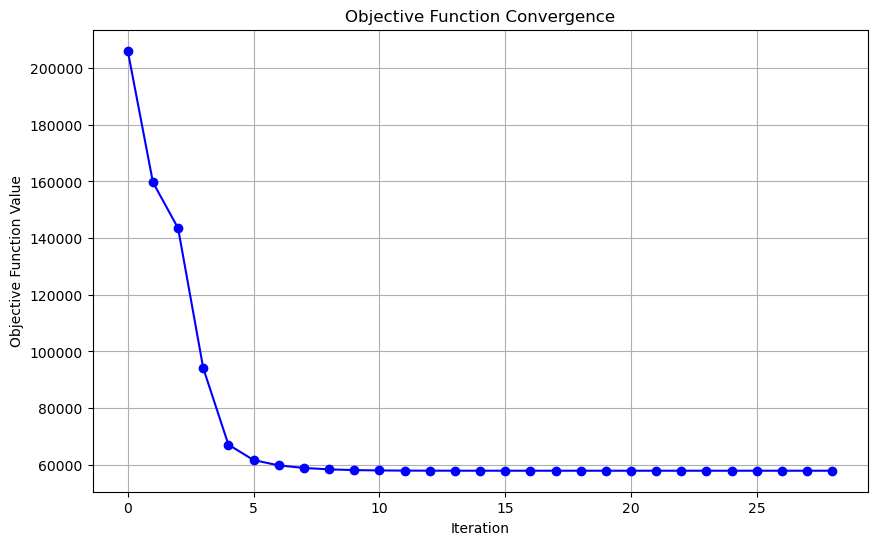

In [32]:
# Plot objective function convergence
pl.plot_objective_function(objective_values)

Based on the obtained graphs, we can conclude that the Fuzzy C-Means (FCM) algorithm works correctly. We divided the data into three clusters according to the number of times hands were raised during the semester and the number of times study resources were accessed. Then, we displayed the final semester grades.

Based on the obtained data, the following conclusions can be made:

1. The number of times hands were raised during the semester is directly proportional to the number of study resources accessed. In other words, the more a student prepared for the subject, the more often they raised their hand to answer questions posed by the teacher.

2. The more a student accessed resources for preparing study materials, and consequently raised their hand more often in class, the higher their final grade for the semester.

There are also data points that do not correlate with the conclusion made; however, their quantity does not impact the overall result and is likely due to external factors, such as the individual learning abilities of certain students, which require further investigation.
